<a href="https://colab.research.google.com/github/veeransr/ML-and-Deep-learning-practice-with-python/blob/master/K_means_clustering_nantonum_and_df_treatment_n_3d_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means Clustering
¶
Introduction
There are many models for clustering out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the K-means is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from unlabeled data. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:

Customer segmentation
Understand what the visitors of a website are trying to accomplish
Pattern recognition
Machine learning
Data compression
In this notebook we practice k-means clustering with 2 examples:

k-means on a random generated dataset
Using k-means for customer segmentation

In [0]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

k-Means on a randomly generated dataset
Lets create our own dataset for this lab!
First we need to set up a random seed. Use numpy's random.seed() function, where the seed will be set to 0

In [0]:
np.random.seed(0)

Next we will be making random clusters of points by using the make_blobs class. The make_blobs class can take in many inputs, but we will be using these specific ones.

Input

n_samples: The total number of points equally divided among clusters.
Value will be: 5000
centers: The number of centers to generate, or the fixed center locations.
Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
cluster_std: The standard deviation of the clusters.
Value will be: 0.9

Output
X: Array of shape [n_samples, n_features]. (Feature Matrix)
The generated samples.
y: Array of shape [n_samples]. (Response Vector)
The integer labels for cluster membership of each sample.

In [0]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

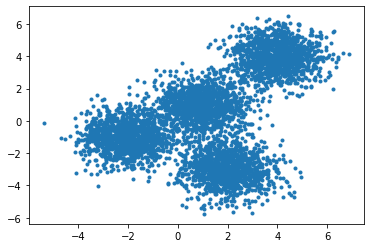

In [0]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

Setting up K-Means
Now that we have our random data, let's set up our K-Means Clustering.
The KMeans class has many parameters that can be used, but we will be using these three:

init: Initialization method of the centroids.
Value will be: "k-means++"
k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
n_clusters: The number of clusters to form as well as the number of centroids to generate.
Value will be: 4 (since we have 4 centers)
n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
Value will be: 12
Initialize KMeans with these parameters, where the output parameter is called k_means.

In [0]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [0]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 3, 0, 0], dtype=int32)

In [0]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822],
       [ 3.97334234,  3.98758687]])

Creating the Visual Plot¶
So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!
Please read through the code and comments to understand how to plot the model.

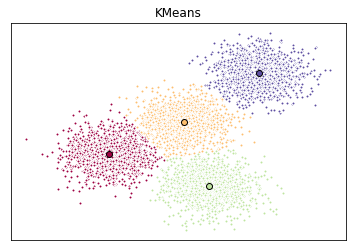

In [0]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


In [0]:
k_means1 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means1.fit(X)
k_means_labels1 = k_means1.labels_
k_means_labels1
k_means_cluster_centers1 = k_means1.cluster_centers_
k_means_cluster_centers

array([[-0.80700142, -0.17035769],
       [ 2.02030226, -2.94614399],
       [ 3.70310165,  3.69627302]])

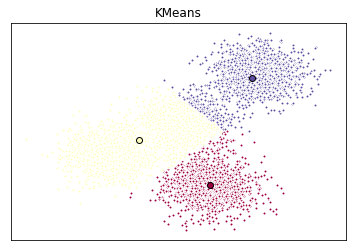

In [0]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels1 == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers1[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

compare the just above and below codes, make sure to learn how to write a simple code, insted of repeating everything

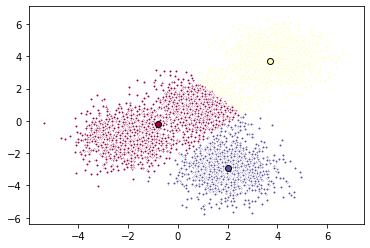

In [0]:
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

Customer Segmentation with K-Means
Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data. Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.
Lets download the dataset. To download the data, we will use !wget to download it from IBM Object Storage.

In [0]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2020-05-21 11:26:33--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.01s   

2020-05-21 11:26:33 (2.70 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [0]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


Pre-processing
As you can see, Address in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.

In [0]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

In [0]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

Modeling¶
In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels.

> Indented block



In [0]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

In [0]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [0]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


Now, lets look at the distribution of customers based on their age and income:

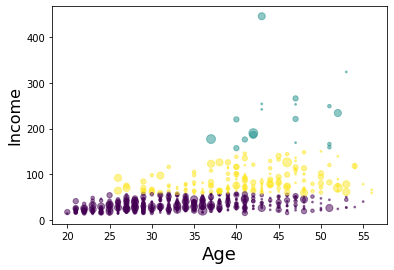

In [0]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

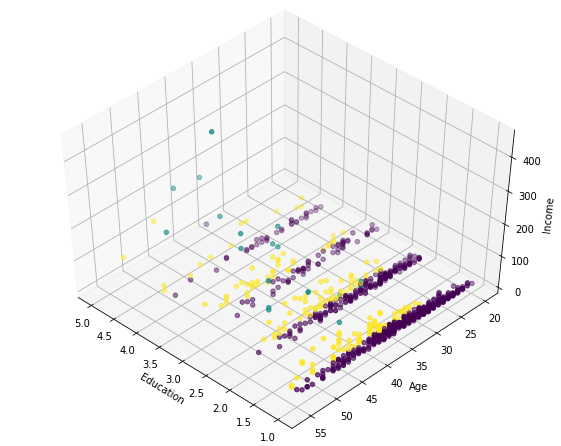

In [0]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

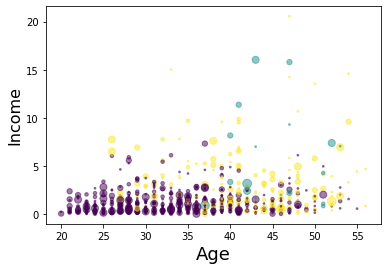

In [0]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 4], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically. Now we can create a profile for each group, considering the common characteristics of each cluster. For example, the 3 clusters can be:

AFFLUENT, EDUCATED AND OLD AGED
MIDDLE AGED AND MIDDLE INCOME
YOUNG AND LOW INCOME